## Higher-order Approximations

Although forward/backward and especially central difference methods are amply sufficient to compute derivatives, in certain cases, it is useful to employ higher order approximations. Fitting a polynomial of higher degree to a function $f(x)$ can result in better approximations of $dy/dx$.  
If you fit a quadratic to $f(x)$, you actually get central difference.  
Similarly, you can fit a cubic, quintic, etc. (odd-degrees) or quadratic, quartic, etc. (even-degrees), to get better approximations.  
Generally, odd-degree approximations are slightly better.

## Second-drivatives

$$ f^{\prime\prime}(x) \simeq \frac{f(x+h)-2f(x)+f(x-h)}{h^2} $$

$$ \epsilon = \frac{4C|f(x)|}{h^2} + \frac{1}{12}h^2f^{\prime\prime\prime\prime}(x) $$

## Partial Derivatives

$$
\begin{align}
\frac{\partial f(x,y)}{\partial x} =& \frac{f(x+h/2,y)-f(x-h/2,y)}{h} \\
\frac{\partial f(x,y)}{\partial y} =& \frac{f(x,y+h/2)-f(x,y-h/2)}{h} 
\end{align}
$$

$$ 
\frac{\partial^2 f(x,y)}{\partial x\partial y} = \frac{f(x+h/2,y+h/2)-f(x-h/2,y+h/2)-f(x+h/2,y-h/2)+f(x-h/2,y-h/2)}{h^2}
$$

## Noisy Data

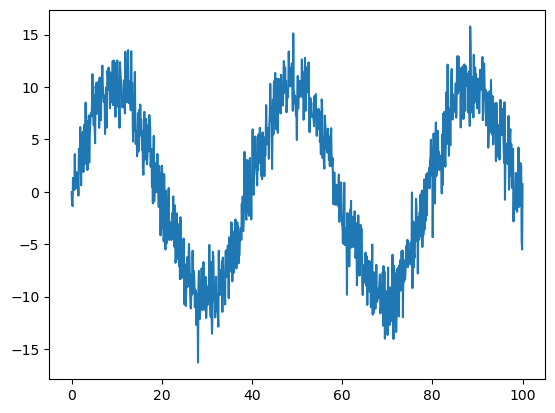

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 100, 1000)
x = 10*np.sin(t/(2*np.pi))
# generating noise
noise = np.random.normal(0,2, len(x)) #  Gaussian noise: μ = 0, σ = 2, size = length of data.

# Add the noise to the data. 
x_noised = x + noise

# plotting noisy data
plt.plot(t,x_noised)

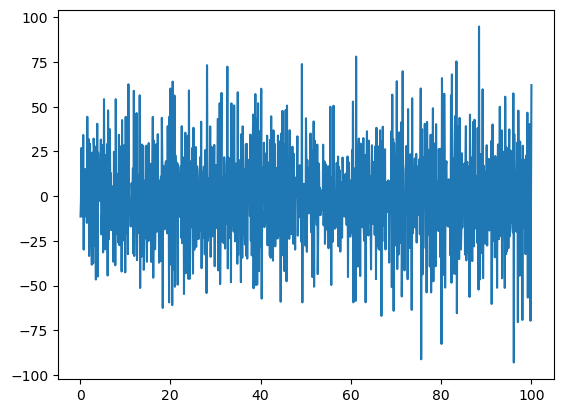

In [2]:
# simple function to calculate derivative using forward difference
def cdiff(x,t):
    dx = x[1:]-x[:-1]
    dt = t[1:]-t[:-1]
    return dx/dt

#plotting derivative
plt.plot(t[1:],cdiff(x_noised,t))

(0.0, 20.0)

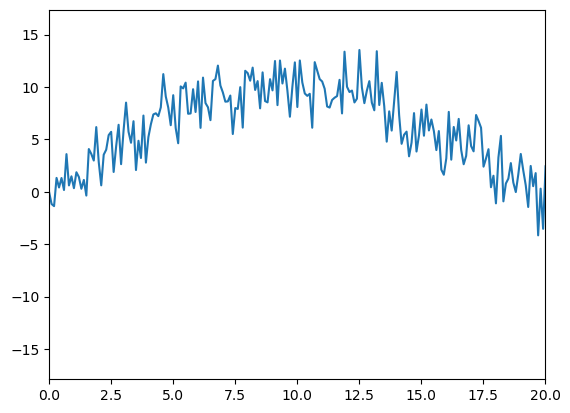

In [3]:
# zoomed-in noisy data
plt.plot(t,x_noised)
plt.xlim(0,20)

(0.0, 20.0)

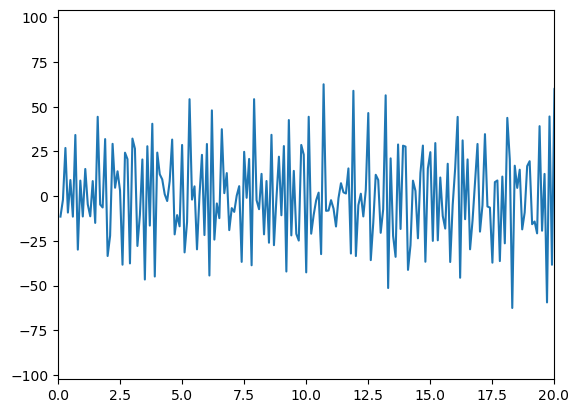

In [4]:
# zoomed-in derivative
plt.plot(t[1:],cdiff(x_noised,t))
plt.xlim(0,20)

(0.0, 20.0)

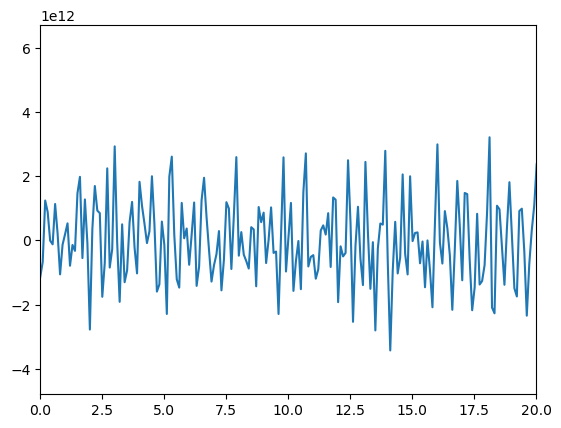

In [5]:
# decreasing h
h = 1e-12
deriv = np.gradient(x_noised,h)
plt.plot(t,deriv)
plt.xlim(0,20)

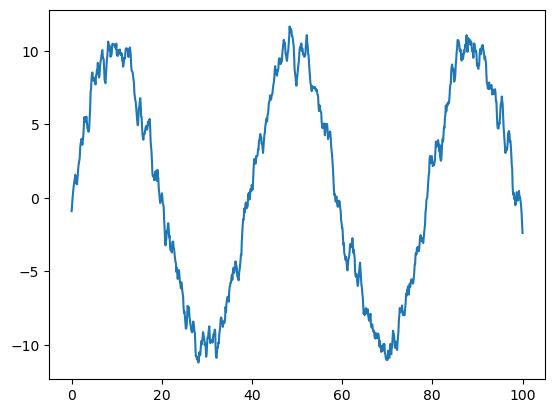

In [6]:
# fitting a smoother function is a solution
# OR Apply smoothing function to the noisy data

from scipy.signal import savgol_filter    # Savitzky-Golay filter

x_noise_removed = savgol_filter(x_noised, 15, 3)
plt.plot(t, x_noise_removed)  # 15 is number of coefficients in the fitted polynomial (less than signal array size), 3 is the order of polynomial used to fit the sample
plt.show()

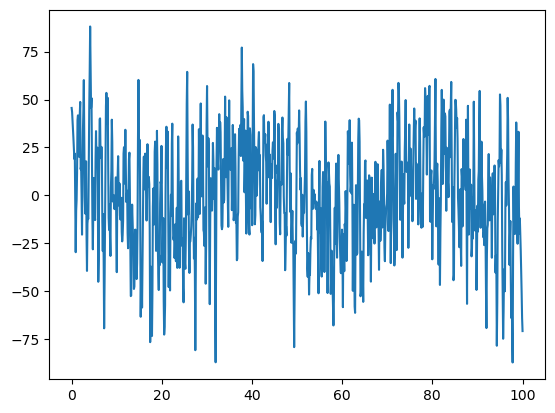

In [7]:
# calculating and plotting derivative of smoothed data
h = 1e-2
deriv = np.gradient(x_noise_removed,h)
plt.plot(t,deriv)

# Interpolation

Let us say we have a function $f(x)$ with known values at $x=a$ and $x=b$. If we want to find a value at some point $a<x<b$, we have to use the method of interpolation.  
The simplest method is linear interpolation.  
$$ f(x) \simeq y+z = \frac{(b-x)f(a)+(x-a)f(b)}{b-a} $$
Higher-order polynomial fitting (Lagrange polynomial) obviously provides better approximations, although for very large N, wiggles due to boundaries may arise (Runges's phenomenon).  

### Best approach -- Splines
**Cubic splines** is a method that combines piecewise fitting of a cubic and subsequent matching of derivatives at their ends to produce a smooth slope.